# Run with EXP3.P.1

100%|██████████| 1000000/1000000 [04:10<00:00, 3994.58it/s]


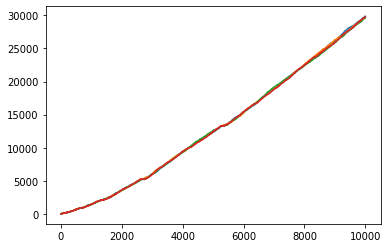

In [1]:
import numpy as np
from queues import EXP3P1, collab
from system import System
import matplotlib.pyplot as plt
from tools import phi1,delta_fun,ordered_BVN
import copy
from tqdm import tqdm

#Define the horizon
T=10**6
# Number of queues N and servers K
N=4
K=4
# Arrival and service rates
arrival_rates=np.array([(N+1)/N**2]*N)
servers = np.array([(N-1)/N**2]*N)
servers[0]= 1
# Folder to save results / uncomment if needed
#folder_name = 'N_4_T106_EXP3P1/'
# Number of exp
n_exp=1
# run with EXP3P1
for l in range(n_exp):
    queues = [EXP3P1(arrival_rates[i],K=N) for i in range(N)]
    system = System(queues=queues,K=N,service_rates=servers)
    for t in tqdm(range(T)):
        system.round(t)
        if t%100==0:
            system.state_summary(t,100)


    h = np.array(system.queue_history)
    for i in range(0,N):
        plt.plot(h[:,i])
    plt.show()
    # save option / uncomment if needed
    #np.savetxt(folder_name+'run'+str(l)+'.csv',system.queue_history,delimiter =',')

# Run with ADEQUA

100%|██████████| 1000000/1000000 [02:17<00:00, 7284.05it/s]


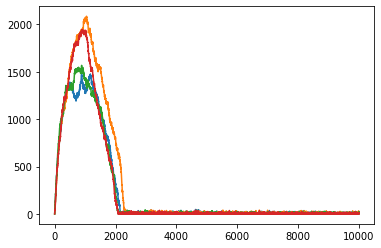

In [2]:
from queues import collab
# Common matrix given to all queues in order to run ordered_BVN
C= np.random.rand(N,N)
# run with ADEQUA
n_exp=1
for l in range(n_exp):
    queues = [collab(lbd=arrival_rates[i],K=K,N=N,rank=i,C=C,alpha=1/4) for i in range(N)]
    system = System(queues=queues,K=N,service_rates=servers)
    for t in tqdm(range(T)):
        system.round(t)
        if t%100==0:
            system.state_summary(t,100)


    h = np.array(system.queue_history)
    for i in range(0,N):
        plt.plot(h[:,i])
    plt.show()
    # save option / uncomment if needed
    #np.savetxt(folder_name+'run'+str(l)+'.csv',system.queue_history,delimiter =',')